In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tck
import numpy as np
import pandas as pd
import os

In [13]:
def plotStatsGA(meanScoresFile, fitnessColor, sizeColor):
    """Plot the stats from the given file for GA

    Args:
        meanScoresFile (string): the file where to read the stats
        fitnessColor (string): the color to use for the tree fitness plot
        sizeColor (string): the color to use for the tree size plot
    """            
    sns.set_theme()
    data=pd.read_csv(meanScoresFile+".csv",header=1)
    fig, ax1 = plt.subplots()
    x=data.loc[:,"gen"]
    means = data.loc[:,"fitness_avg"]
    std = data.loc[:,"fitness_std"]
    meansize = data.loc[:,"size_avg"]
    stdsize = data.loc[:,"size_std"]
    
    def buildAX(ax, means, std, color, label, fitOrSize):
        """
        Build a single axes of the plot

        Args:
            ax (Axes): the axes to build
            means (Dataframe): the means to plot
            std (Dataframe): the standard deviation to plot
            color (string): the color to use
            label (string): the label of the y axis
            fitOrSize (boolean): if the plot is for fitness or size (used to compute ticks)
        """
        ax.plot(x,means,color+'-')
        ax.fill_between(x, means-std,means+std, alpha=0.4, facecolor=color)
        ax.set_ylabel(label, color=color)
        for tl in ax.get_yticklabels():
            tl.set_color(color)
        minV = np.min(means-std)
        maxV = np.max(means+std)
        mod = 10 if not fitOrSize else \
             250 if (maxV-minV)//250<12 else \
             500 if (maxV-minV)//500<12 else \
            1000 if (maxV-minV)//1000<12 else \
            3000 if (maxV-minV)//3000<12 else \
            5000 if (maxV-minV)//5000<12 else \
            10000 if (maxV-minV)//10000<12 else \
            20000
        minVal = minV - minV%mod
        maxVal = maxV + mod - maxV%mod
        nticks = int((maxVal-minVal)/mod)+1
        ax.set_ylim(minVal, maxVal)
        ax.set_yticks(np.linspace(minVal,maxVal, nticks))
        ax.yaxis.set_major_locator(tck.LinearLocator(nticks))
        
    with sns.axes_style("darkgrid"):
        ax1.set_xlabel("Generation")
        buildAX(ax1, means, std, fitnessColor, "Fitness", True)
        ax2=ax1.twinx()
        buildAX(ax2, meansize, stdsize, sizeColor, "Size", False)
        ax2.grid(None)
    plt.title("Average Fitness and Size")
    plt.savefig(meanScoresFile+".png")
    plt.show()
        
def plotStatsRL(file, scoresColor, meanColor):
    """Plot the stats from the given file for RL

    Args:
        file (string): the file where to read the stats
        scoresColor (string): the color to use for the scores plot
        meanColor (string): the color to use for the scores mean
    """ 
    nepisodes = 10
    
    sns.set_theme()
    data=pd.read_csv(file+".csv", comment="#", header=None)
    obsnum=len(data)//nepisodes
    dataReshaped=np.reshape(data,(nepisodes,obsnum))
    means = np.mean(dataReshaped, axis=0)
    fig, ax = plt.subplots()

    for i in range(nepisodes):
        ax.plot(dataReshaped[i],scoresColor,alpha=0.25)
    ax.plot(means, label='Mean value', color=meanColor, linewidth=1)
    ax.set_xlabel("Game number")
    ax.set_ylabel("Score")
    ax.set_title("Score per game")
    ax.legend()
    ax.set_xlim(0, obsnum)
    ax.set_ylim(np.min(data), np.max(data))
    # Show the plot
    plt.savefig(file+".png")
    plt.show()

In [17]:
def chooseCoupleOfColors():
    """
    Extract two different colors at random from the list of colors

    Returns:
        _type_: _description_
    """
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    randomIndex1 = np.random.randint(0,len(colors))
    randomIndex2 = np.random.randint(0,len(colors))
    while randomIndex1 == randomIndex2:
        randomIndex2 = np.random.randint(0,len(colors))
    color1 = colors[randomIndex1]
    color2 = colors[randomIndex2]
    return color1, color2

In [8]:
def reloadPlotsFor(GAorRL):
    agent = "Agent"+GAorRL+"/"
    functionToUse = plotStatsGA if GAorRL == "GA" else plotStatsRL
    spaces = ["StandardSpace/", "ContinuousSpace/"]
    boosts = ["noBoost/", "boost/"]
    counters = ["noCounter/", "counter/"]
    for space in spaces:
        for boost in boosts:
            for counter in counters:
                files = os.listdir("../scores/"+agent+space+boost+counter)
                for file in files:
                    if file.endswith(".csv"):
                        print(GAorRL+": Found file: ", space+boost+counter+file)
                        fileCut = file[:-4]
                        functionToUse("../scores/"+agent+space+boost+counter+fileCut, *chooseCoupleOfColors())

def reloadAllPlots():
    """
    Main function to reload all the plots
    """
    reloadPlotsFor("GA")
    reloadPlotsFor("RL")

GA: Found file:  StandardSpace/noBoost/noCounter/pop200_ngen15_tsz10.csv


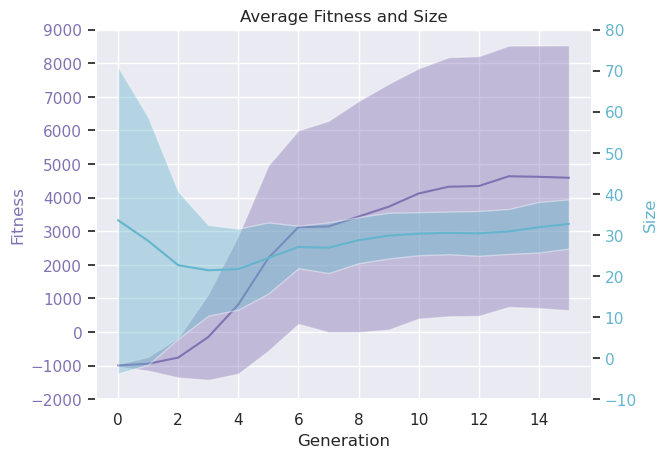

GA: Found file:  StandardSpace/noBoost/noCounter/pop200_ngen15_tsz7.csv


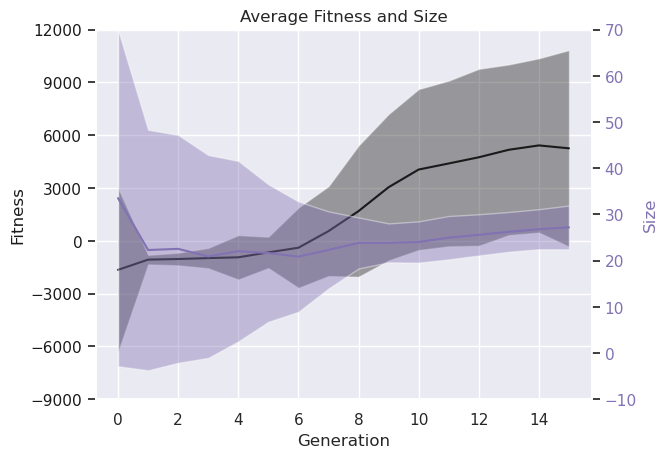

GA: Found file:  StandardSpace/noBoost/noCounter/pop100_ngen15_tsz7.csv


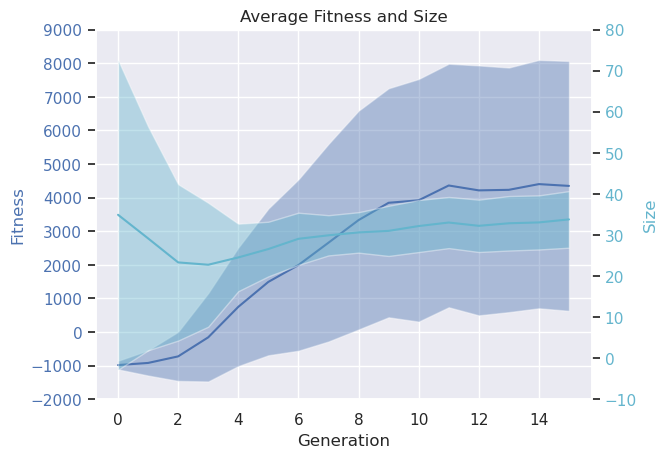

GA: Found file:  StandardSpace/noBoost/noCounter/pop100_ngen10_tsz7.csv


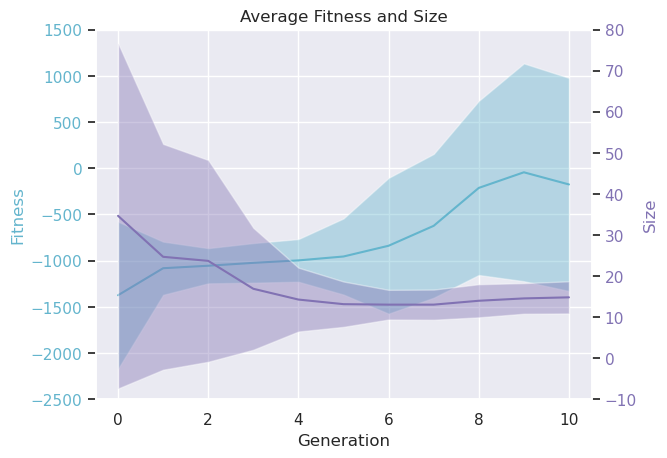

GA: Found file:  StandardSpace/noBoost/noCounter/pop200_ngen10_tsz7.csv


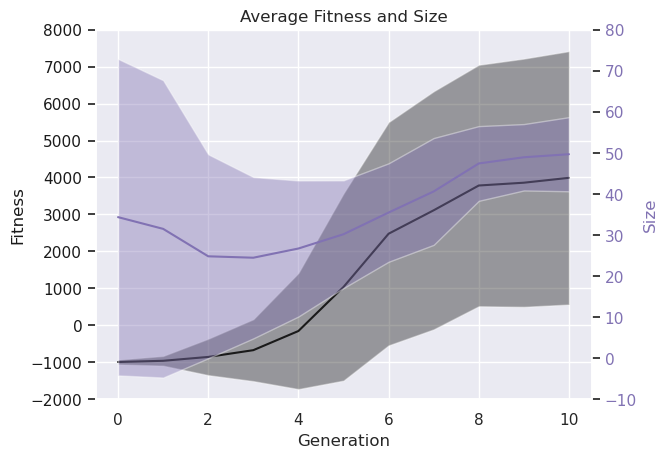

GA: Found file:  StandardSpace/noBoost/counter/pop200_ngen15_tsz10.csv


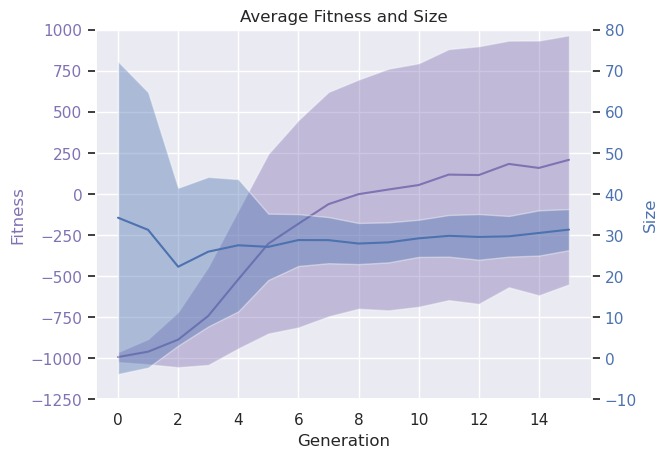

GA: Found file:  StandardSpace/noBoost/counter/pop200_ngen15_tsz7.csv


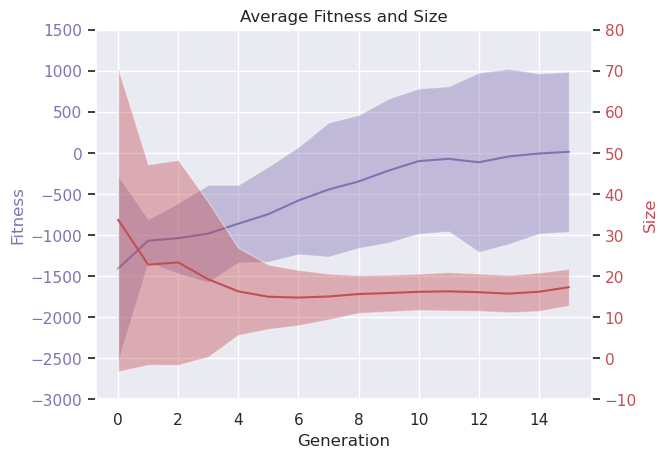

GA: Found file:  StandardSpace/noBoost/counter/pop100_ngen10_tsz7.csv


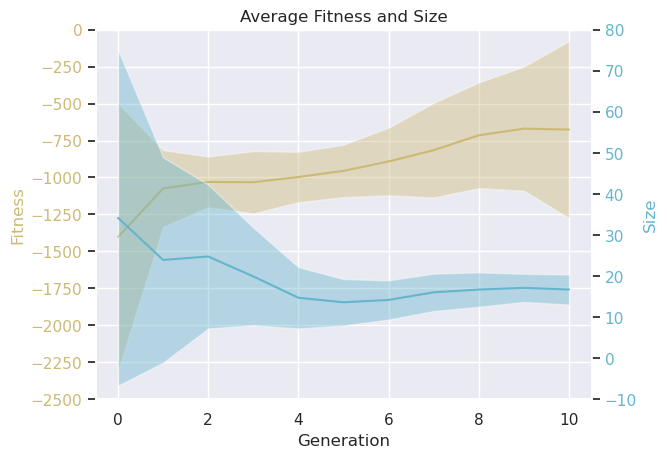

GA: Found file:  StandardSpace/boost/noCounter/pop200_ngen15_tsz7.csv


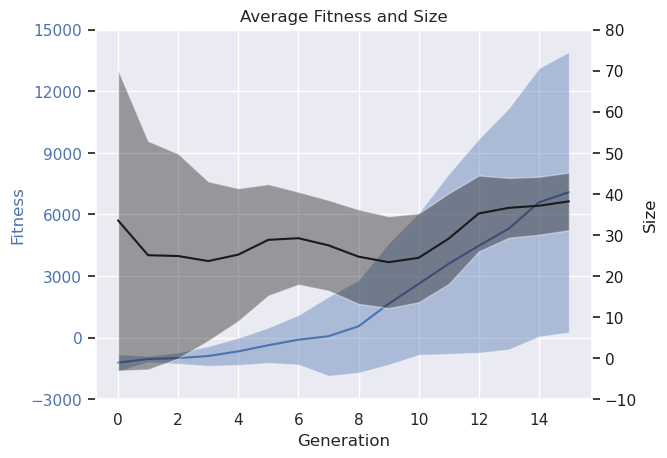

GA: Found file:  StandardSpace/boost/noCounter/pop100_ngen10_tsz7.csv


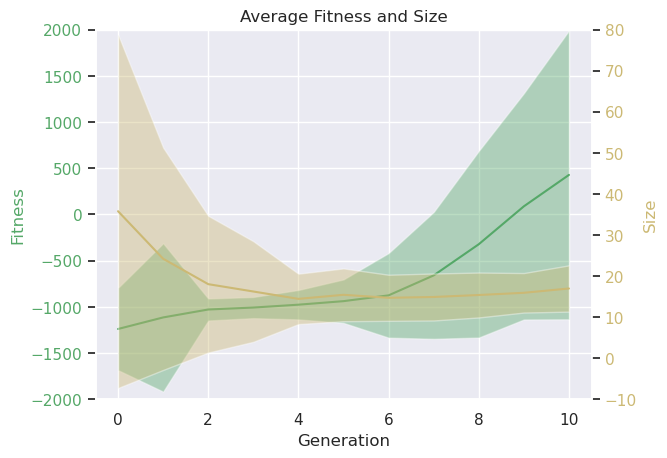

GA: Found file:  StandardSpace/boost/counter/pop200_ngen15_tsz7.csv


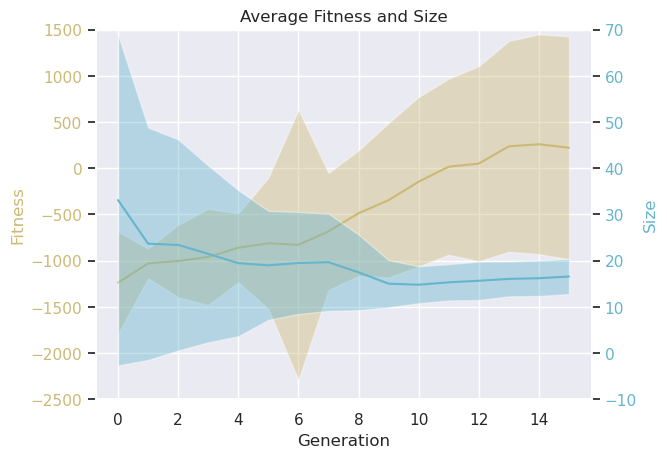

GA: Found file:  StandardSpace/boost/counter/pop100_ngen10_tsz7.csv


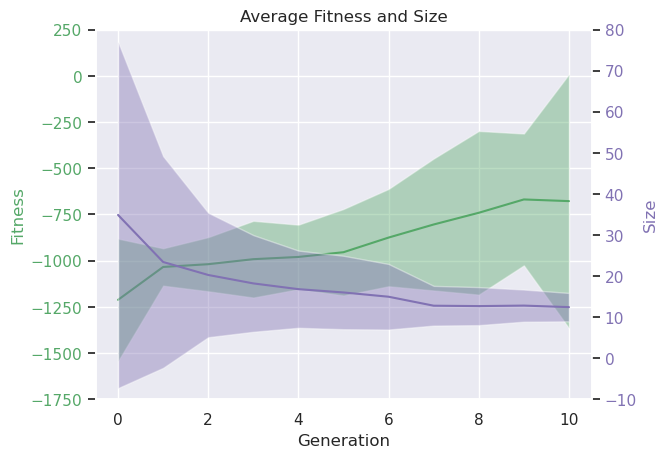

GA: Found file:  ContinuousSpace/noBoost/noCounter/pop200_ngen15_tsz10.csv


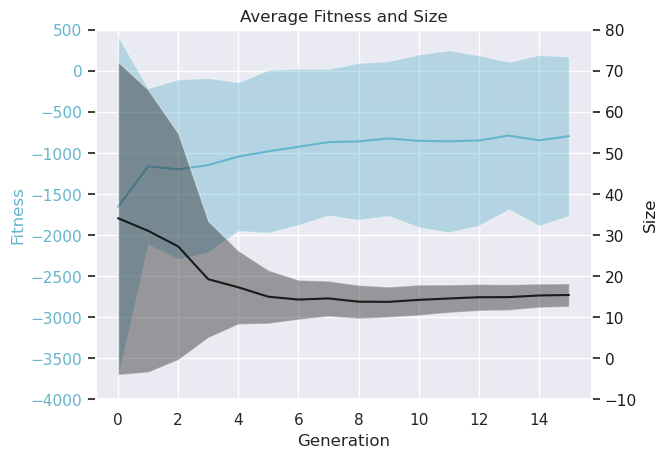

GA: Found file:  ContinuousSpace/noBoost/noCounter/pop200_ngen15_tsz7.csv


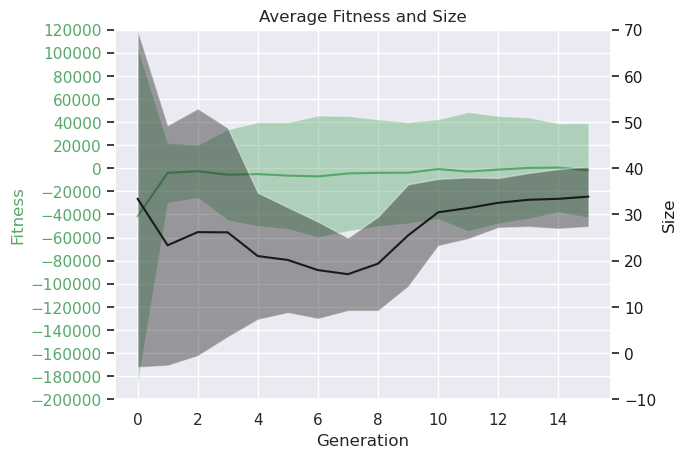

GA: Found file:  ContinuousSpace/noBoost/noCounter/pop100_ngen15_tsz7.csv


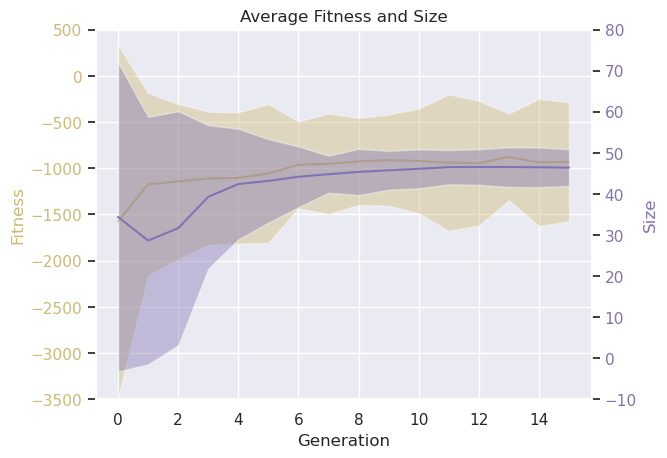

GA: Found file:  ContinuousSpace/noBoost/noCounter/pop200_ngen10_tsz7.csv


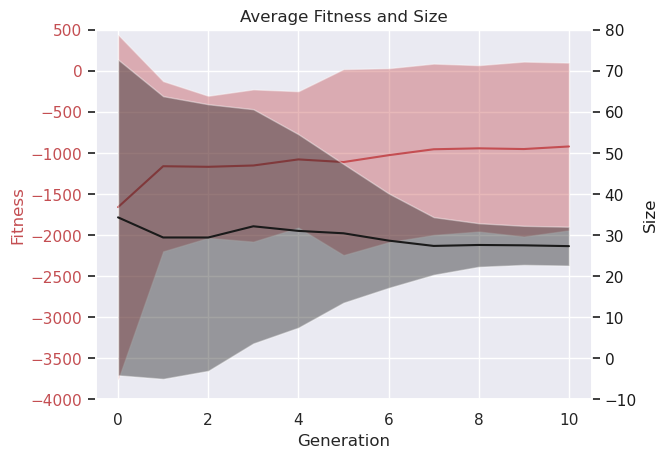

GA: Found file:  ContinuousSpace/noBoost/counter/pop200_ngen15_tsz7.csv


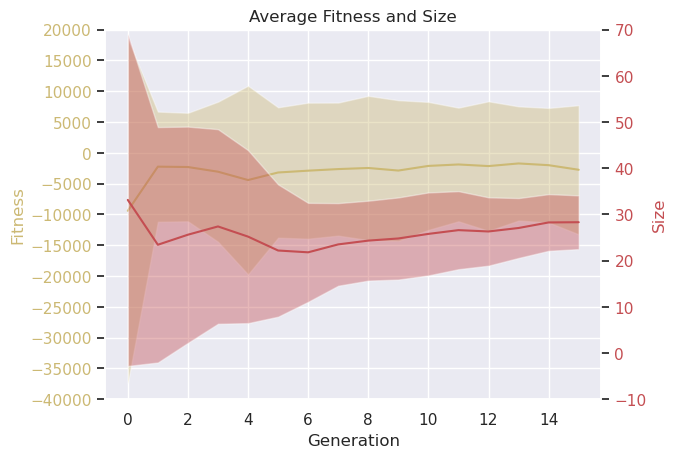

GA: Found file:  ContinuousSpace/noBoost/counter/pop100_ngen10_tsz7.csv


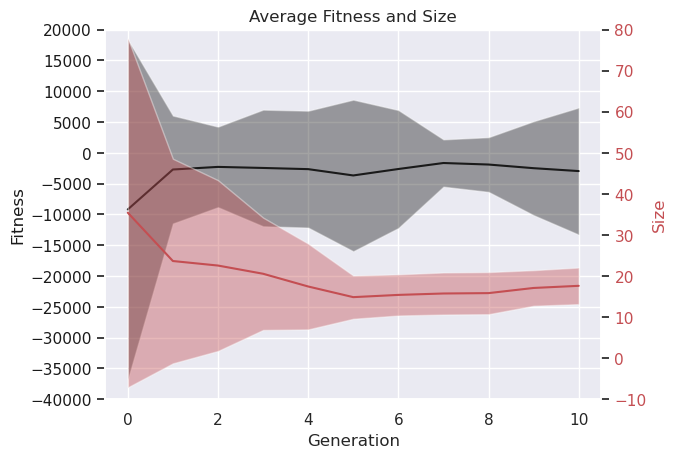

GA: Found file:  ContinuousSpace/boost/noCounter/pop200_ngen15_tsz7.csv


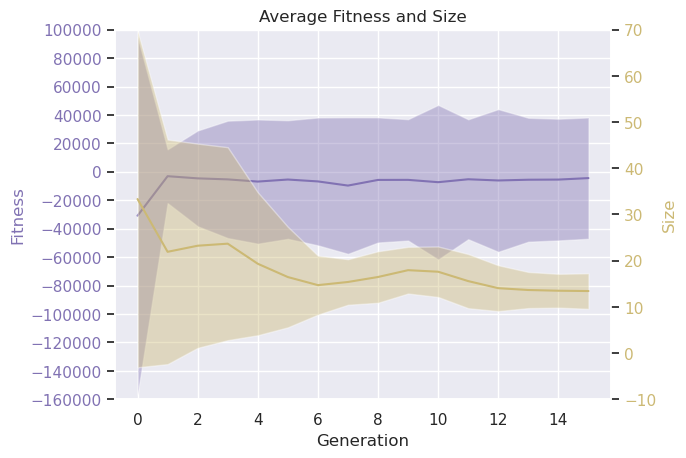

GA: Found file:  ContinuousSpace/boost/noCounter/pop100_ngen10_tsz7.csv


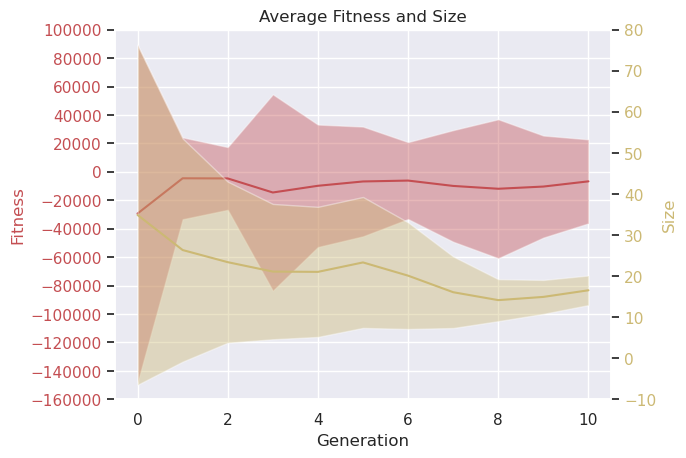

GA: Found file:  ContinuousSpace/boost/counter/pop200_ngen15_tsz7.csv


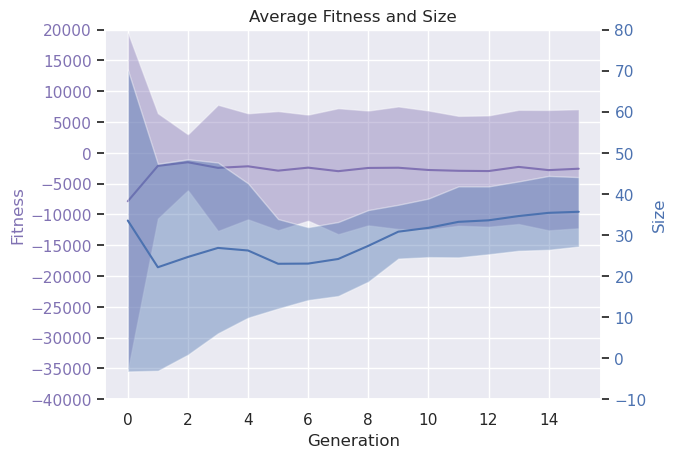

GA: Found file:  ContinuousSpace/boost/counter/pop100_ngen10_tsz7.csv


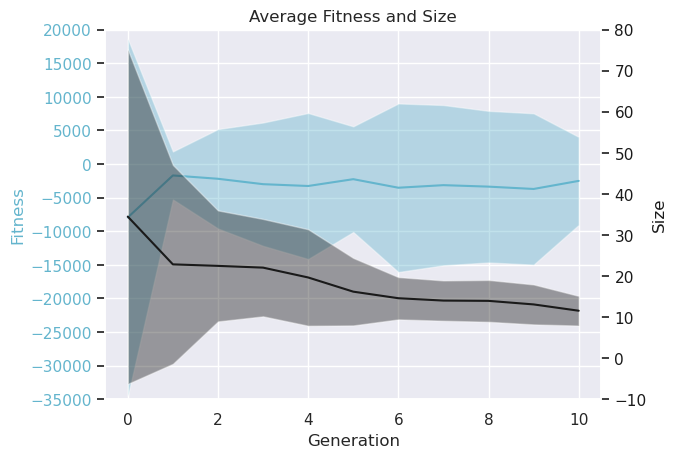

RL: Found file:  StandardSpace/noBoost/noCounter/neps10_epsz200_thr1000_ExpectedSARSA.csv


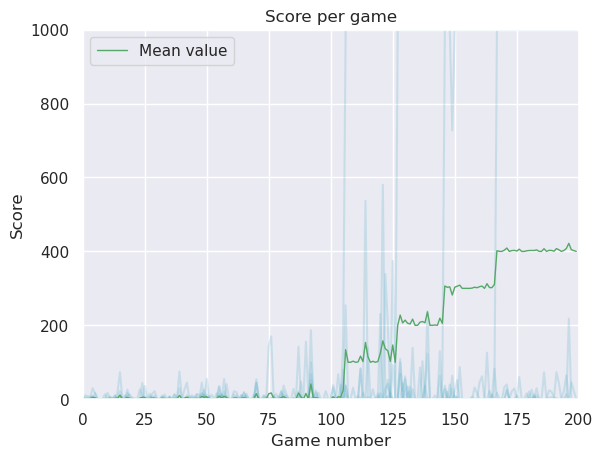

RL: Found file:  StandardSpace/noBoost/counter/neps10_epsz200_thr1000_ExpectedSARSA.csv


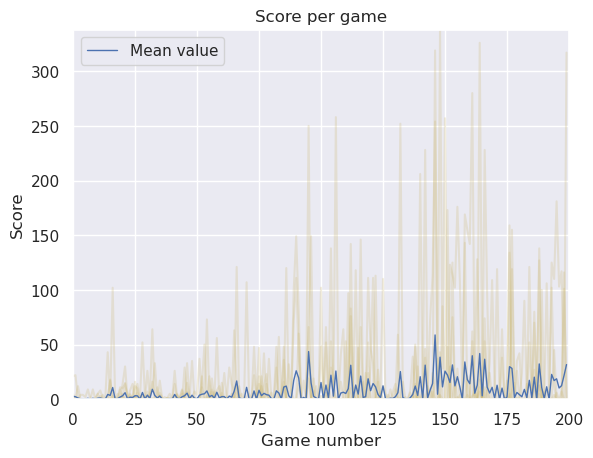

RL: Found file:  StandardSpace/boost/noCounter/neps10_epsz200_thr1000_ExpectedSARSA.csv


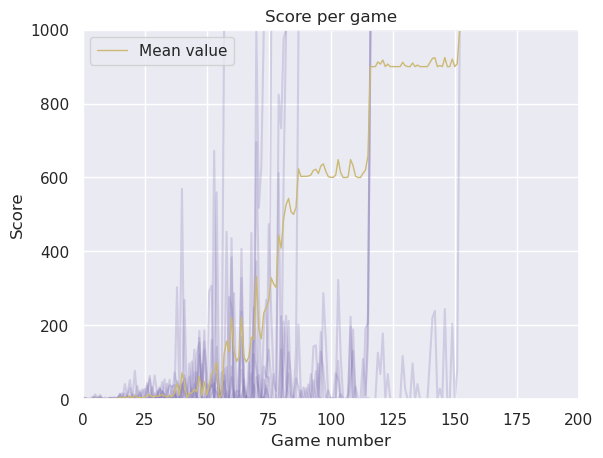

RL: Found file:  StandardSpace/boost/counter/neps10_epsz200_thr1000_ExpectedSARSA.csv


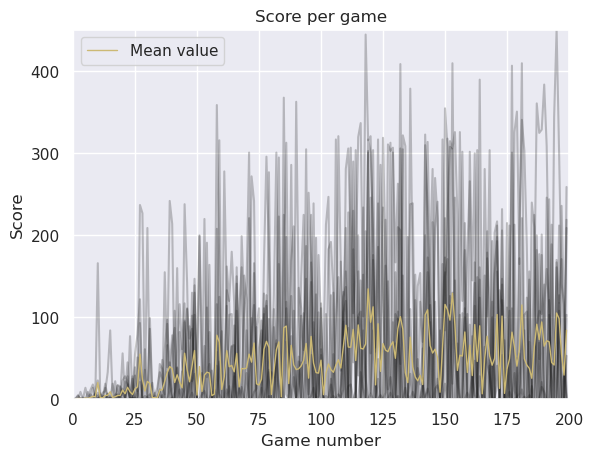

RL: Found file:  ContinuousSpace/noBoost/noCounter/neps10_epsz50_thr1000_ExpectedSARSA.csv


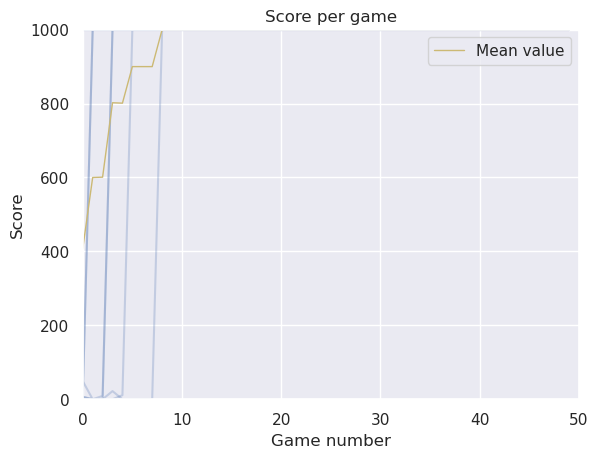

RL: Found file:  ContinuousSpace/noBoost/counter/neps10_epsz100_thr1000_ExpectedSARSA.csv


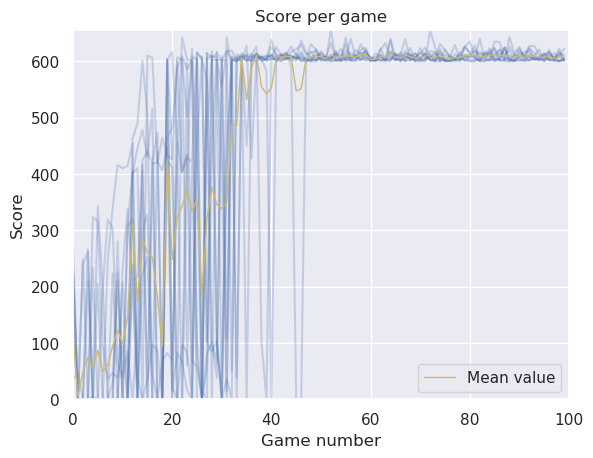

RL: Found file:  ContinuousSpace/boost/noCounter/neps10_epsz50_thr1000_ExpectedSARSA.csv


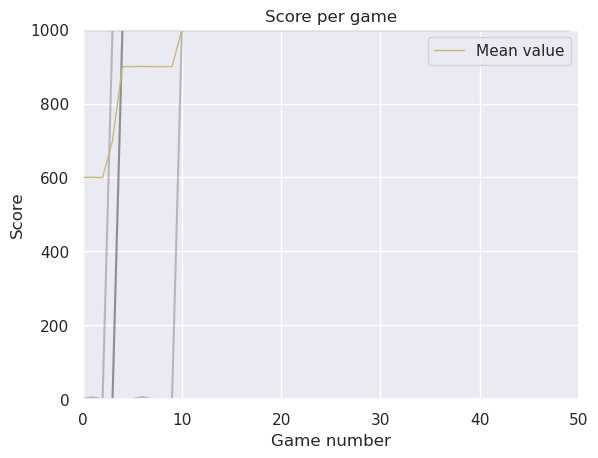

RL: Found file:  ContinuousSpace/boost/counter/neps10_epsz200_thr1000_ExpectedSARSA.csv


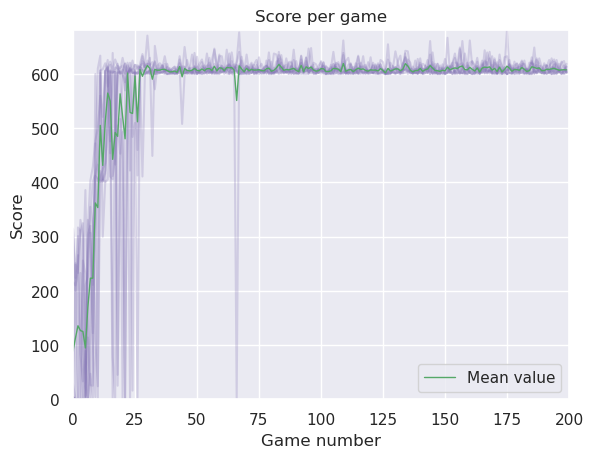

In [18]:
reloadAllPlots()